# Whether a first date will lead to a relationship

# Table Of Content

- [1. Questions](#q)
- [2. Data Preprocessing](#pre)
- [3. Grid Search with Cross-validationa](#GS)
    - [2.1 Trial 1](#t1)
    - [2.2 Trail 2](#t2)
    - [2.3 Trial 3](#t3)
    - [2.4 Trial 4](#t4)
    - [2.5 Trial 5](#t5)
    - [2.6 Conclusion on Trials](#con)    
- [4. Random Search](#RS)
- [5. Bayesian Search](#BS)
- [6. Conclusion](#con2)
- [6. References](#ref)

<a id="q"></a>
# 1.Questions


#### Define the problem. What is the input? What is the output? What data mining function is required? What could be the challenges? What is the impact? What is an ideal solution?

    - The problem: we are going to predict the outcome of a specific speed dating session based on the profile of two people, so we can implement a recommendation system to better match people in speed dating events.
    
    - The input: the profile of two people 
    
    - The output:  we are going to predict the probability (0-1, float) that the dating session will lead to a successful match.
    - What data mining function?: - Hence the match which the target variable is a categoral variable so the data mining function is classification.
    
    - What could be the challenges?: the data has a lot of missing values or unbalance
    - What is the impact?: 1.figuring out what are most features that impact the matching
                           2.understanding users perferences
                           3.recommendation to better match people in speed dating events. 
    - What is an ideal solution?: the solution may be to check which features have the highest impact on matching then handle them checking their missing, incorrect or irrelevant values and trying to solve them then do machine learning model with different set of features bansed on their correlation and null values then figuring out what are best hyperparamters that leads to the best score

#### preprocessing steps are used?
- Putting null threshold to drop some features based on it and try different threshold values
- Putting correlation coefficient threshold to drop some features based on it and try different threshold values
- Edit and manipulate some incorrect values

#### Why a simple linear regression model (without any activation function) is not good for classification task, compared to Perceptron/Logistic regression?
    - Linear regression is not suitable for classification tasks because it deals with continuous values whereas classification problems mandate discrete values. In other words, linear regression models are used to predict a continuous target variable whereas classification models are used to predict a categorical target variable. Linear regression models can predict any value between negative infinity and positive infinity, whereas classification models can only predict a finite number of classes Perceptron and logistic regression are classification algorithms that are used to predict a binary outcome (0 or 1). They use an activation function (such as sigmoid) to map the output of a linear function to a probability value between 0 and 1. The output of the activation function is then compared to a threshold value (usually 0.5) to make a binary prediction

#### What's a decision tree and how it is different to a logistic regression model?
    - A decision tree is a flowchart-like tree structure that is used for classification and prediction1. Each internal node denotes a test on an attribute, each branch represents an outcome of the test, and each leaf node (terminal node) holds a class label. Decision Trees bisect the space into smaller and smaller regions.Logistic Regression fits a single line to divide the space exactly into two. It is searching for a single linear decision boundary in your feature space. Logistic Regression is essentially fitting a single line to divide the space exactly into two.In summary, Decision Trees bisect the space into smaller and smaller regions whereas Logistic Regression fits a single line to divide the space exactly into two.

#### What's the difference between grid search and random search?

    - grid search looks at every possible combination of hyperparameters to find the best model, random search only selects and tests a random combination of hyperparameters. 

#### What's the difference between bayesian search and random search?
    - bayesian search remember the past choices of hyperparameters as priors and use that knowledge to make better future choices (posterior) while random search only selects and tests a random combination of hyperparameters. 

In [110]:
# importing important librairies
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.datasets import fetch_openml
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost.sklearn import XGBClassifier
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.model_selection import PredefinedSplit

In [111]:
df2 = pd.read_csv('train.csv') # reading the training data
y = df2['match'] # getting the target column - the Y -
X = df2.drop('match', axis=1) # getting the feature columns after removing the target column - The X-




<AxesSubplot:>

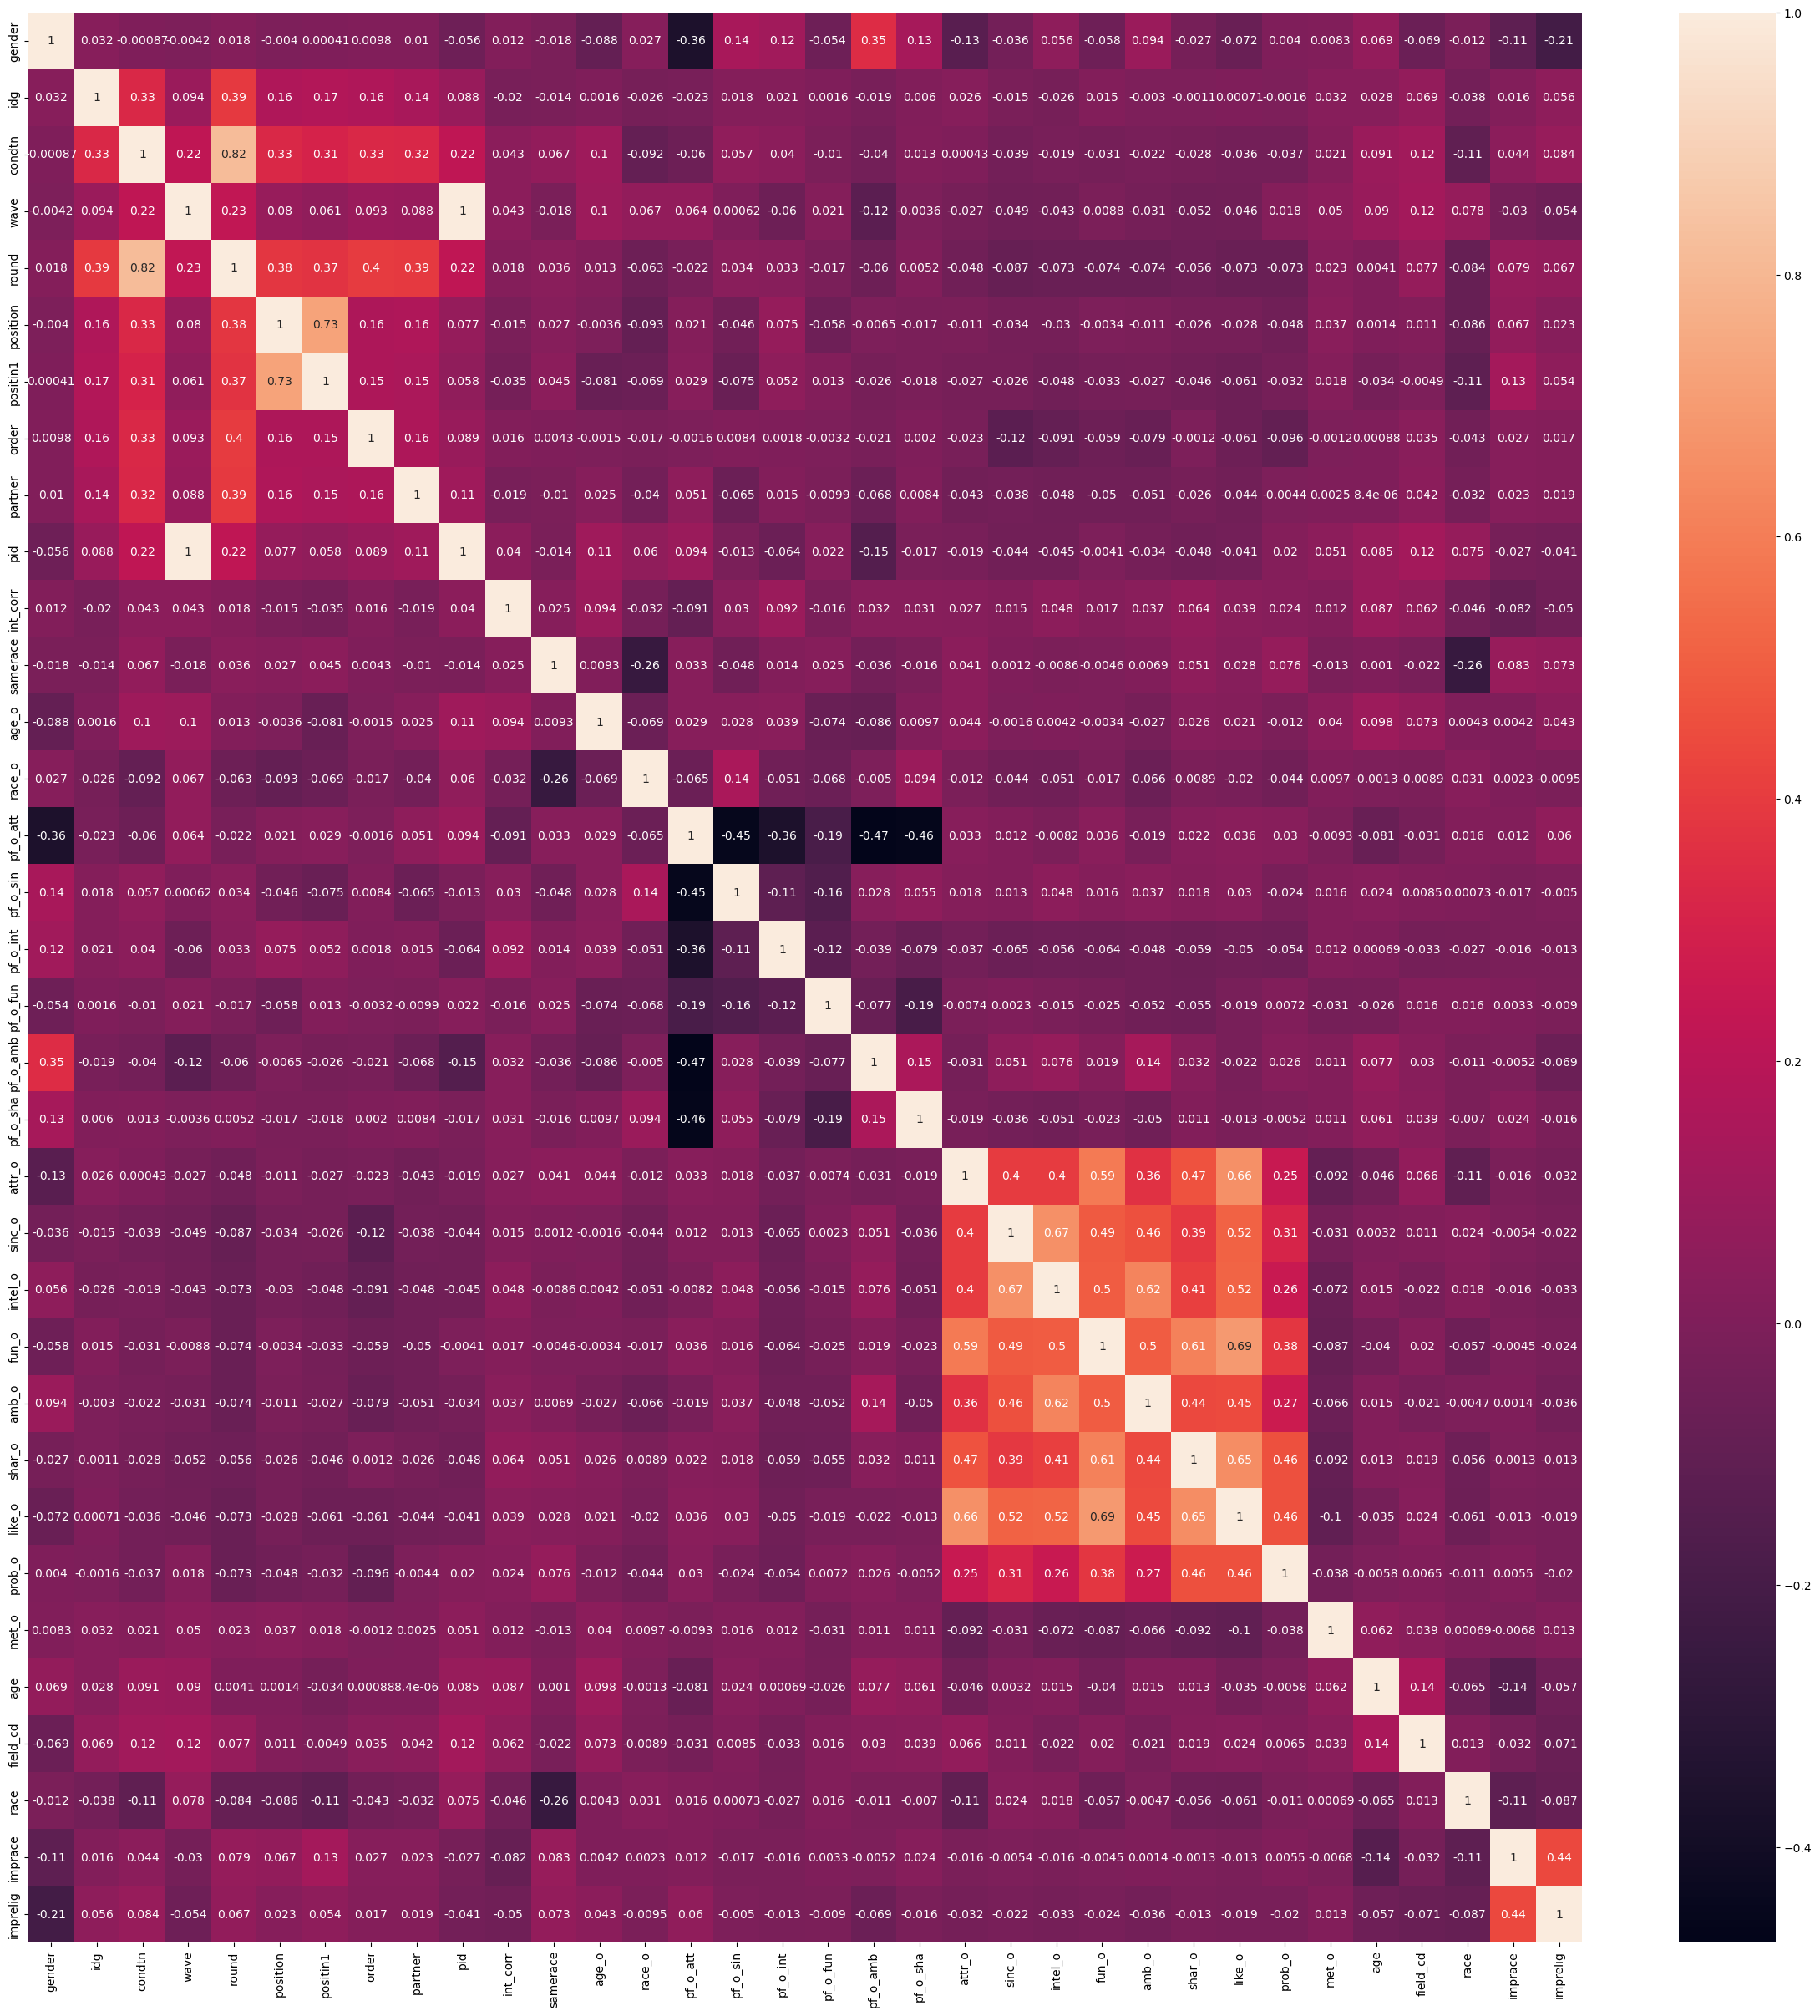

In [112]:

plt.figure(figsize=(30, 30))
sns.heatmap(X[X.columns[0:40]].corr(), annot=True)  #print correlation matrix

In [113]:
df_with_threshold_corr = X.corr() # save correlation matrix into an object

In [126]:
# the code below get features based on specific correlation coefficient ciriteria
temp = df_with_threshold_corr[(df_with_threshold_corr != 1) & ((df_with_threshold_corr>=0.49) | (df_with_threshold_corr <= -0.49))].dropna(axis=1, how='all').dropna(axis=0, how='all')
temp

,condtn,wave,round,position,positin1,pid,attr_o,sinc_o,intel_o,fun_o,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
condtn,NaN,NaN,0.820898,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
wave,NaN,NaN,NaN,NaN,NaN,0.996714,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
round,0.820898,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
position,NaN,NaN,NaN,NaN,0.725619,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
positin1,NaN,NaN,NaN,0.725619,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
attr5_3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.858673,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sinc5_3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.608213,NaN,NaN,NaN,NaN,NaN,0.498313,NaN,NaN
intel5_3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.683871,NaN,NaN,NaN,0.498313,NaN,NaN,NaN
fun5_3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.771447,NaN,NaN,NaN,NaN,NaN,NaN


#### The target of correlation matrix above is to use it to drop one of high correlated features.

In [127]:
X['undergra'].unique()[:30] # print first 30 values of `undergra` column


array(['University of Michigan-Ann Arbor', nan,
       'Rizvi College of Architecture, Bombay University',
       'Harvard College', 'colby college, waterville, me', 'UW Madison',
       'Arizona State', 'Harvard',
       'S.V Regional Engineering College,India',
       'Novosibirsk State University', 'Oxford', 'Princeton University',
       'Rice', 'Brown', 'Tufts University', 'McGill University',
       'Cal Berkeley', 'Ecole Normale Sup\x8erieure, Paris',
       'Columbia College', 'California State University Los Angeles',
       'University of Washington', 'University of Texas', 'NYU',
       'Cornell University', 'Univ of New Mexico', 'Stanford University',
       'Princeton', 'Univ. of Bombay', 'Penn State University',
       'Sarah Lawrence College'], dtype=object)

<a id="pre"></a>
## 2. Preprocessing
- Putting null threshold to drop some features based on it and try different threshold values
- Putting correlation coefficient threshold to drop some features based on it and try different threshold values
- Edit and manipulate some incorrect values

In [128]:
class preprocessing():
    columns_to_get_null_threshold = []
    column_to_drop = []
    column_correlated_column = {}
    # the function below edit some typo in the `undergra` column
    def remove_university(self, x):
        x = str(x)
        x = x.lower().strip() 
        x = x.replace('university of', '').strip()
        x = x.replace('university', '').strip()
        x = x.replace('universidad de', '').strip()
        x = x.replace('college', '').strip()
        x = x.replace('univ of', '').strip()
        x = x.replace('u of', '').strip()
        return x
    # the function below remove `,` sign so we can treat the income column as a float
    def edit_income(self, x): 
        x = str(x)
        x = x.replace(',', '').strip()
        return x
    # the function below do the preprocessing in the training set.
    def train_preprocessing(self, X, null_threshold = 0.5, correlation_coeff=0.49):
        self.columns_to_get_null_threshold = X.loc[:, X.isin([' ','NULL', np.nan]).mean() < 1 - null_threshold].columns # getting columns which has less than 50% null values
        X = X[columns_to_get_null_threshold] # removing the columns which has more than null_threshold% null values
        X = X.drop('id', axis=1) # drop the `id` column
        X['undergra'] = X['undergra'].apply(self.remove_university) # correct the values in undergra column by applying the `remove_university` function
        X['undergra'].fillna('gra', inplace=True) # fill the null value of gra which refers to graduated
        X['income'] = X['income'].apply(self.edit_income) # correct the value in the income columns
        X.income = X.income.astype(float) # convert the data type of the income column to float
        for gra_or_not in X['undergra'].unique(): # here we gonna fill the null values in the income column based on the average of each university in the `undergra` column
                X.income = np.where(X.undergra==gra_or_not, X.income.fillna(X.income.mean()), X.income).round(0)
        
        cc = X.corr() # calculting the correlation matrix
        temp = X[(cc != 1) & ((cc>=correlation_coeff) | (cc <= -1 * correlation_coeff))].dropna(axis=1, how='all').dropna(axis=0, how='all') #getting columns which has correlation coefficient greater than correlation_coeff o less than -correlation_coeff
        # the below loop get columns that have larger correlation than other columns and save it a dictionary to drop them later
        for column in temp.columns:
            max_correlated_column = temp[column].idxmax() # getting the most correlated feature
            column_correlated_column[column] = max_correlated_column # save the max correlated deature in a dictionary
            if (X[column].isnull().sum() > X[max_correlated_column].isnull().sum()): # check with column has more null values
                self.column_to_drop.append(column) # save the columns which has more null values to drop them later
            else:
                self.column_to_drop.append(max_correlated_column) # save the columns which has more null values to drop them later
        X = X.drop(self.column_to_drop, axis=1) # drop high correlated column
        return X # return the processed data
    # the function below do the preprocessing in the test set.
    def test_preprocessing(self, test_data_orig):
        test_data = test_data_orig[self.columns_to_get_null_threshold] # # removing the columns which has more than 50% null values
        test_data = test_data_orig.drop('id', axis=1) # drop the `id` column
        test_data = test_data_orig.drop(self.column_to_drop, axis=1) # drop high correlated column
        test_data['undergra'] = test_data['undergra'].apply(self.remove_university) # correct the values in undergra column by applying the `remove_university` function
        test_data['undergra'].fillna('gra', inplace=True) # fill the null value of gra which refers to graduated
        test_data['income'] = test_data['income'].apply(self.edit_income) # correct the value in the income columns
        test_data.income = test_data.income.astype(float)  # convert the data type of the income column to float
        for gra_or_not in test_data['undergra'].unique(): # here we gonna fill the null values in the income column based on the average of each university in the `undergra` column
                test_data.income = np.where(test_data.undergra==gra_or_not, test_data.income.fillna(test_data.income.mean()), test_data.income).round(0)

        return test_data # reuturn the processed test data
    def pipline(self, X):

        features_numeric = list(X.select_dtypes(include=['float64', 'int64'])) # select the numeric features
        features_categorical = list(X.select_dtypes(include=['category']))  # select the categorical features

        # print('numeric features:', features_numeric)
        # print('categorical features:', features_categorical)

        # define a pipe line for numeric feature preprocessing
        # we gave them a name so we can set their hyperparameters
        transformer_numeric = Pipeline(
            steps=[
                ('imputer', SimpleImputer()),
                ('scaler', StandardScaler())]
        )

        # define a pipe line for categorical feature preprocessing
        # we gave them a name so we can set their hyperparameters
        transformer_categorical = Pipeline(
            steps=[
                ('imputer', SimpleImputer()),
                ('onehot', OneHotEncoder())]
        )
        # define the preprocessor 
        # we gave them a name so we can set their hyperparameters
        # we also specify what are the categorical 
        preprocessor = ColumnTransformer(
            transformers=[
                ('num', transformer_numeric, features_numeric),
                ('cat', transformer_categorical, features_categorical)
            ]
        )

        # combine the preprocessor with the model as a full tunable pipeline
        # we gave them a name so we can set their hyperparameters
        full_pipline = Pipeline(
            steps=[
                ('preprocessor', preprocessor),
                ('my_classifier', 
                   RandomForestClassifier(), # here we use RandomForestClassifier
                )
            ]
        )

        return full_pipline

In [129]:

def full_model(X, drop_null_rate, correlation_coff):
    pre_process = preprocessing() # create object from preprocessing class
    X = pre_process.train_preprocessing(X, drop_null_rate, correlation_coff) # call the train_preprocessing function
    full_pipline = pre_process.pipline(X) # get the full pipline

    param_grid = {
        #'preprocessor__num__imputer__strategy': ['mean'],
        # preprocessor__num__imputer__strategy points to preprocessor->num (a Pipeline)-> imputer -> strategy
        'my_classifier__n_estimators': [100, 150, 200], # n_estimators
         # my_classifier__n_estimators points to my_classifier->n_estimators 
        'my_classifier__max_depth':[7,8,9,10,12,15,20],    # max depth parameters
        'my_classifier__bootstrap': [False], # boot strapping
        'my_classifier__criterion': ['entropy']
    }

    grid_search = GridSearchCV(
        full_pipline, param_grid, cv=4, verbose=0, 
        scoring='roc_auc')

    grid_search.fit(X, y) # fit the grid search
    print('best score {}'.format(grid_search.best_score_)) # priting best score
    print('best Paramters {}'.format(grid_search.best_params_)) # print best paramters
    return grid_search

<a id="GS"></a>
# 3. Grid Search with Cross-validation

<a id="t1"></a>
## 3.1 Trial 1:
- we will try grid search with random forest algorithm with different hyperparamters after removing null columns based on specific ciritera which is have 50% null values and after droping corrlated features which have correlation coefficient greater than or equal to 0.49 or less than or equal to -0.49

In [94]:
grid_search = full_model(X, 0.5, 0.49) # call the model with defined hyperparamters

best score 0.8705986683712037
best score {'my_classifier__bootstrap': False, 'my_classifier__criterion': 'entropy', 'my_classifier__max_depth': 12, 'my_classifier__n_estimators': 200}


- we get 87% score so we gonna use different null threshold and see the result

<a id="t2"></a>
## 3.2 Trial 2:
- we will try grid search with random forest algorithm with different hyperparamters after removing null columns based on specific ciritera which is have 70% null values and after droping corrlated features which have correlation coefficient greater than or equal to 0.49 or less than or equal to -0.49

In [95]:
grid_search = full_model(X, 0.7, 0.49) # call the model with defined hyperparamters

best score 0.8700659076252043
best score {'my_classifier__bootstrap': False, 'my_classifier__criterion': 'entropy', 'my_classifier__max_depth': 8, 'my_classifier__n_estimators': 150}


- After increasing null threshold the score goes down so in the next Trial we will try to decrease the null threshold to be less than 0.5

<a id="t3"></a>
## 3.3 Trial 3:
- we will try grid search with random forest algorithm with different hyperparamters after removing null columns based on specific ciritera which is have 40% null values and after droping corrlated features which have correlation coefficient greater than or equal to 0.49 or less than or equal to -0.49

In [130]:
grid_search = full_model(X, 0.4, 0.49) # call the model with defined hyperparamters

best score 0.8701283417628344
best score {'my_classifier__bootstrap': False, 'my_classifier__criterion': 'entropy', 'my_classifier__max_depth': 10, 'my_classifier__n_estimators': 200}


- As we can see the score goes down when we decrease the null threshold so we gonna fix the null threshold at 0.5 and try to increase the correlation coefficient

<a id="t4"></a>
## 3.4 Trial 4:
- we will try grid search with random forest algorithm with different hyperparamters after removing null columns based on specific ciritera which is have 50% null values and after droping corrlated features which have correlation coefficient greater than or equal to 0.6 or less than or equal to -0.6

In [131]:
grid_search = full_model(X, 0.5, 0.6) # call the model with defined hyperparamters

best score 0.870739038393288
best score {'my_classifier__bootstrap': False, 'my_classifier__criterion': 'entropy', 'my_classifier__max_depth': 9, 'my_classifier__n_estimators': 200}


- the score increases a little bit by 0.0002 so we will give at another try.

<a id="t5"></a>
## 3.5 Trial 5:
we will try grid search with random forest algorithm with different hyperparamters after removing null columns based on specific ciritera which is have 50% null values and after droping corrlated features which have correlation coefficient greater than or equal to 0.7 or less than or equal to -0.7

In [132]:
grid_search = full_model(X, 0.5, 0.7) # call the model with our defined hyperparamters

best score 0.8708828911277894
best score {'my_classifier__bootstrap': False, 'my_classifier__criterion': 'entropy', 'my_classifier__max_depth': 12, 'my_classifier__n_estimators': 150}


- the score increases a little bit by 0.0001 so we will give at another try.

In [133]:
grid_search = full_model(X, 0.5, 0.8) # call the model with our defined hyperparamters

best score 0.8704093231235446
best score {'my_classifier__bootstrap': False, 'my_classifier__criterion': 'entropy', 'my_classifier__max_depth': 9, 'my_classifier__n_estimators': 100}


- The score decreased so we will go with 0.5 as null threshold to drop columns with 50% null values and 0.7 as correlation threshold to drop correlated features

<a id="con"></a>
# 3.6 Conclusion on Trials:

- In the five trials above we drop different columns and use different features in the model based on correlation coefficient and null values. and we found that the best trial that gives the highest score is trial 5. so we will go through its hyperparamters and its used features

In [69]:
test_data_orig = pd.read_csv('test.csv') # reading the test data
test_data = pre_process.test_preprocessing(test_data_orig.copy()) # do the preprocessing

submission = pd.DataFrame() # create a dataframe
submission['id'] = test_data_orig['id'] # get the id column

submission['match'] = grid_search.predict_proba(test_data)[:,1] # predict the values

submission.to_csv('sample_submission_walkthrough.csv', index=False) # save the result

<a id="random"></a>
# 4. Random Search 

In [136]:

def full_model_random_search(X, drop_null_rate, correlation_coff):
    pre_process = preprocessing() # create object from preprocessing class
    X = pre_process.train_preprocessing(X, drop_null_rate, correlation_coff) # call the train_preprocessing function
    full_pipline = pre_process.pipline(X) # get the full pipline
    
    param_grid = {
        #'preprocessor__num__imputer__strategy': ['mean'],
        # preprocessor__num__imputer__strategy points to preprocessor->num (a Pipeline)-> imputer -> strategy
        'my_classifier__n_estimators': [100, 150, 200], # n_estimators
         # my_classifier__n_estimators points to my_classifier->n_estimators 
        'my_classifier__max_depth':[7,8,9,10,12,15,20],    # max depth parameters
        'my_classifier__bootstrap': [False], # boot strapping
        'my_classifier__criterion': ['entropy']
    }
    random_search = RandomizedSearchCV(
        full_pipline, param_grid, cv=5, verbose=0, n_jobs=2, 
        # number of random trials
        n_iter=10,
        scoring='roc_auc')

    random_search.fit(X, y)

    print('best score {}'.format(grid_search.best_score_)) # priting best score
    print('best score {}'.format(grid_search.best_params_)) # print best paramters

In [137]:
random_search = full_model_random_search(X, 0.5, 0.7) # calling random search with our defined threshold 

best score 0.8703459865556338
best score {'my_classifier__bootstrap': False, 'my_classifier__criterion': 'entropy', 'my_classifier__max_depth': 9, 'my_classifier__n_estimators': 200}


- The random search gets almost the same score with 0.0005 decrease but only in 10 iterations and less time.

<a id="bayes"></a>
# 5. Bayesian Search

In [101]:
# Let's try this with SVM model
pre_process = preprocessing() # create object from preprocessing class
X = pre_process.train_preprocessing(X, 0.5, 0.6) # call the train_preprocessing function
features_numeric = list(X.select_dtypes(include=['float64', 'int64'])) # select the numeric features
features_categorical = list(X.select_dtypes(include=['category']))  # select the categorical features

preprocessor = ColumnTransformer(
    transformers=[
        ('num', transformer_numeric, features_numeric),
        ('cat', transformer_categorical, features_categorical)
    ]
)

SVC_pipline = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('my_svc', SVC(class_weight='balanced'))
    ]
)
# SVC has a class_weight attribute for unbalanced data


# define ranges for bayes search
bayes_search = BayesSearchCV(
    SVC_pipline,
    {
        'my_svc__C': Real(1e-6, 1e+6, prior='log-uniform'),
        'my_svc__gamma': Real(1e-6, 1e+1, prior='log-uniform'),
        'my_svc__degree': Integer(1,8),
        'my_svc__kernel': Categorical(['linear', 'poly', 'rbf']),
    },
    # number of trials 
    n_iter=3,
    random_state=0,
    verbose=1,
    # we still use 
    cv=4,
)

bayes_search.fit(X, y)

print('best score {}'.format(bayes_search.best_score_)) # print best score
print('best score {}'.format(bayes_search.best_params_)) # print best paramters


Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
Fitting 4 folds for each of 1 candidates, totalling 4 fits
best score 0.8297505824537358
best score OrderedDict([('my_svc__C', 0.0012602593949011189), ('my_svc__degree', 8), ('my_svc__gamma', 2.285959941576884), ('my_svc__kernel', 'poly')])


- Bayesian Search gets 82% score using SVC which is the worsest score.

<a id="con2"></a>
# 6. Conclusion:
- The best algorithm used is random forest
- The best paramters used are 'bootstrap': False, 'criterion': 'entropy', 'max_depth': 12, 'n_estimators': 150}
- The best score gotten is 87.088%
- The best search used is grid search

<a id="ref"></a>
# 7. References:

- https://medium.com/analytics-vidhya/why-linear-regression-is-not-suitable-for-classification-cd724dd61cb8
- https://www.geeksforgeeks.org/decision-tree/
- https://blog.bigml.com/2016/09/28/logistic-regression-versus-decision-trees/
- https://medium.com/analytics-vidhya/hyperparameter-search-bayesian-optimization-14be6fbb0e09